In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
modelicaData = pd.read_csv('./data/exportedVariables.csv')
fmuData = pd.read_csv('./data/fmuVariables.csv', index_col=0)

In [41]:
modelicaData

,time,lead_car.y,Plant.y,et.y,PID.ut
0,0.000000,10.000000,0.000000,0.000000,0.000000
1,0.003835,10.009601,0.000001,0.009599,19.691012
2,0.003835,10.009601,0.000001,0.009599,19.691012
3,0.010000,10.025087,0.000021,0.025067,41.480743
4,0.020000,10.050350,0.000148,0.050202,63.031043
...,...,...,...,...,...
6999,69.970000,1722.498537,1712.699368,-0.200830,-109.921246
7000,69.980000,1722.499350,1712.700295,-0.200945,-109.961022
7001,69.990000,1722.499837,1712.700874,-0.201036,-109.991692
7002,70.000000,1722.500000,1712.701105,-0.201105,-110.013271


In [42]:
modelicaData.dtypes

time          float64
lead_car.y    float64
Plant.y       float64
et.y          float64
PID.ut        float64
dtype: object

In [43]:
fmuData

,time,x_err,x_tgt,x_ego,u
0,0.00,0.000000,10.000000,0.000000,0.000000
1,0.01,0.025000,10.025000,0.000000,0.000000
2,0.02,0.050175,10.050175,0.000000,0.000000
3,0.03,0.075525,10.075525,0.000000,59.750000
4,0.04,0.100869,10.101050,0.000181,70.418250
...,...,...,...,...,...
6996,69.96,-0.291007,1722.509250,1712.800257,-118.210671
6997,69.97,-0.289804,1722.510550,1712.800354,-117.656255
6998,69.98,-0.288555,1722.511525,1712.800080,-117.084710
6999,69.99,-0.287291,1722.512175,1712.799466,-116.496815


In [44]:
fmuData.dtypes

time     float64
x_err    float64
x_tgt    float64
x_ego    float64
u        float64
dtype: object

In [45]:
# Rename lead_car.y to x_tgt, Plant.y to x_ego, et.y to x_err
modelicaData.rename(columns={'lead_car.y':'x_tgt', 'Plant.y':'x_ego', 'et.y':'x_err', 'PID.ut':'u'}, inplace=True)
modelicaData

,time,x_tgt,x_ego,x_err,u
0,0.000000,10.000000,0.000000,0.000000,0.000000
1,0.003835,10.009601,0.000001,0.009599,19.691012
2,0.003835,10.009601,0.000001,0.009599,19.691012
3,0.010000,10.025087,0.000021,0.025067,41.480743
4,0.020000,10.050350,0.000148,0.050202,63.031043
...,...,...,...,...,...
6999,69.970000,1722.498537,1712.699368,-0.200830,-109.921246
7000,69.980000,1722.499350,1712.700295,-0.200945,-109.961022
7001,69.990000,1722.499837,1712.700874,-0.201036,-109.991692
7002,70.000000,1722.500000,1712.701105,-0.201105,-110.013271


In [46]:
# Get the intersection of the two dataframes on the time column, and diff all other columns to get the error
errorData = pd.merge(modelicaData, fmuData, on='time', suffixes=('_model', '_fmu'))
errorData['x_tgt'] = errorData['x_tgt_model'] - errorData['x_tgt_fmu']
errorData['x_ego'] = errorData['x_ego_model'] - errorData['x_ego_fmu']
errorData['x_err'] = errorData['x_err_model'] - errorData['x_err_fmu']
errorData['u'] = errorData['u_model'] - errorData['u_fmu']
errorData[['time', 'x_tgt', 'x_ego', 'x_err', 'u']]

,time,x_tgt,x_ego,x_err,u
0,0.00,0.000000,0.000000,0.000000,0.000000
1,0.01,0.000087,0.000021,0.000067,41.480743
2,0.02,0.000175,0.000148,0.000027,63.031043
3,0.03,0.000262,0.000450,-0.000187,17.410908
4,0.04,0.000350,0.000789,-0.000439,18.074841
...,...,...,...,...,...
6737,69.97,-0.012013,-0.100987,0.088974,7.735009
6738,69.98,-0.012175,-0.099786,0.087610,7.123688
6739,69.99,-0.012338,-0.098593,0.086255,6.505123
6740,70.00,-0.012500,-0.097409,0.084909,5.880096


In [47]:
# Get the percentual deviation of FMU from the Model at any moment in time (with smoothing around zero values)
errorData['x_tgt_pct'] = errorData['x_tgt'] / errorData['x_tgt_model']
errorData['x_ego_pct'] = errorData['x_ego'] / errorData['x_ego_model']
errorData['x_err_pct'] = errorData['x_err'] / errorData['x_err_model']
errorData['u_pct'] = errorData['u'] / errorData['u_model']
errorData[['time', 'x_tgt_pct', 'x_ego_pct', 'x_err_pct', 'u_pct']]

,time,x_tgt_pct,x_ego_pct,x_err_pct,u_pct
0,0.00,0.000000,NaN,NaN,NaN
1,0.01,0.000009,1.000000,0.002664,1.000000
2,0.02,0.000017,1.000000,0.000536,1.000000
3,0.03,0.000026,1.000000,-0.002486,0.225644
4,0.04,0.000035,0.813427,-0.004370,0.204251
...,...,...,...,...,...
6737,69.97,-0.000007,-0.000059,-0.443029,-0.070369
6738,69.98,-0.000007,-0.000058,-0.435992,-0.064784
6739,69.99,-0.000007,-0.000058,-0.429050,-0.059142
6740,70.00,-0.000007,-0.000057,-0.422211,-0.053449


In [48]:
def plotError(data, column, label):
    sns.set_style('whitegrid')
    sns.lineplot(x='time', y=column, data=data)
    plt.xlabel('Time (s)')
    plt.ylabel(label)
    
    plt.title(f"Error of {label}")
    
    plt.savefig(f"./graphs/error_{column}.png", dpi=300)
    
    plt.show()

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

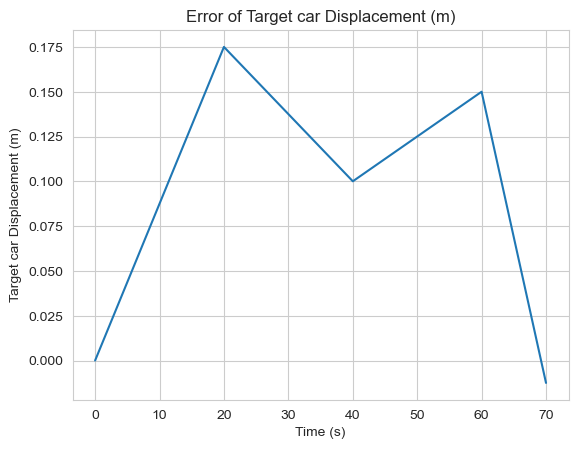

In [49]:
plotError(errorData, 'x_tgt', 'Target car Displacement (m)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

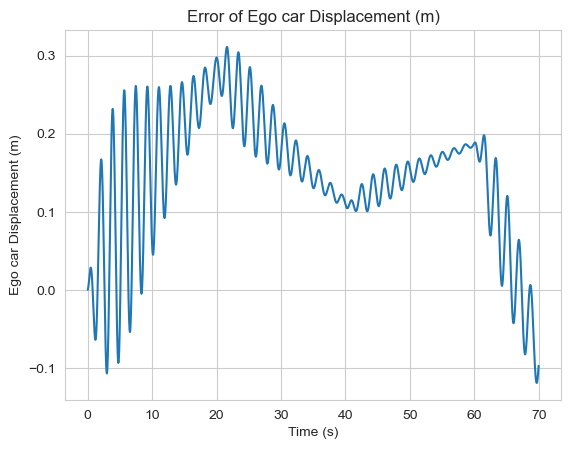

In [50]:
plotError(errorData, 'x_ego', 'Ego car Displacement (m)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

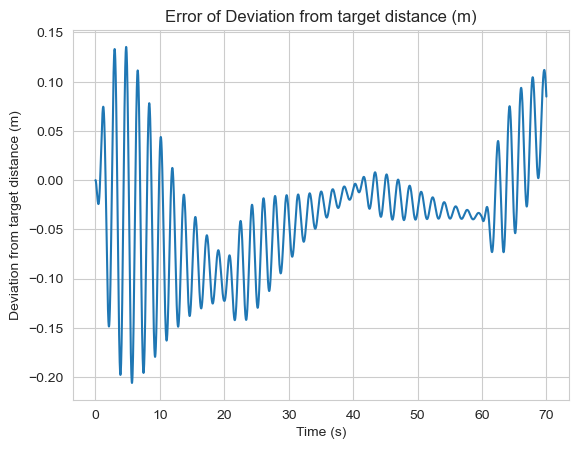

In [51]:
plotError(errorData, 'x_err', 'Deviation from target distance (m)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

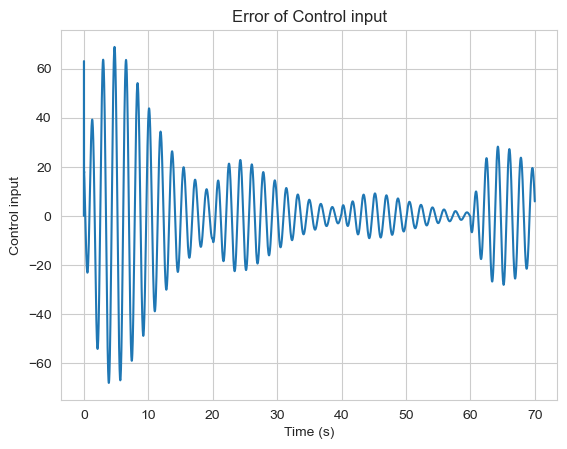

In [52]:
plotError(errorData, 'u', 'Control input')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

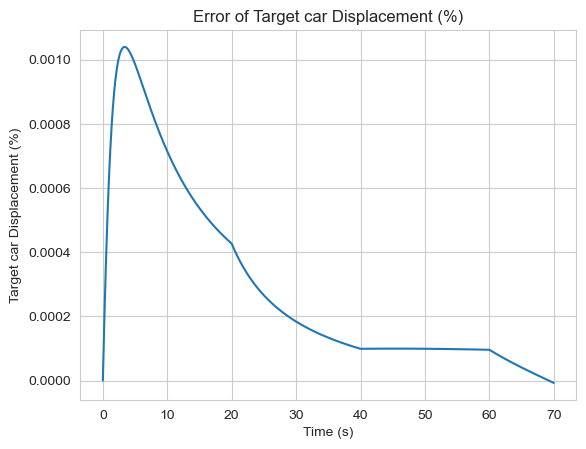

In [53]:
# Get percentual deviation
plotError(errorData, 'x_tgt_pct', 'Target car Displacement (%)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

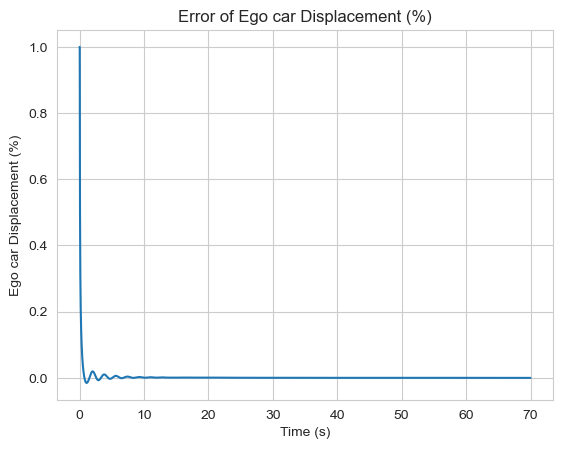

In [54]:
plotError(errorData, 'x_ego_pct', 'Ego car Displacement (%)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

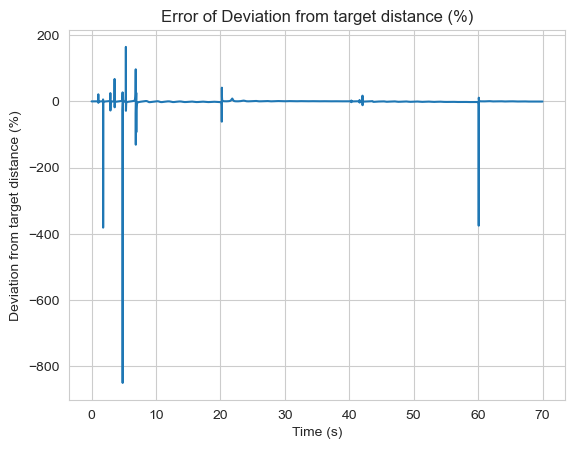

In [55]:
plotError(errorData, 'x_err_pct', 'Deviation from target distance (%)')

A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
A:\Programs\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

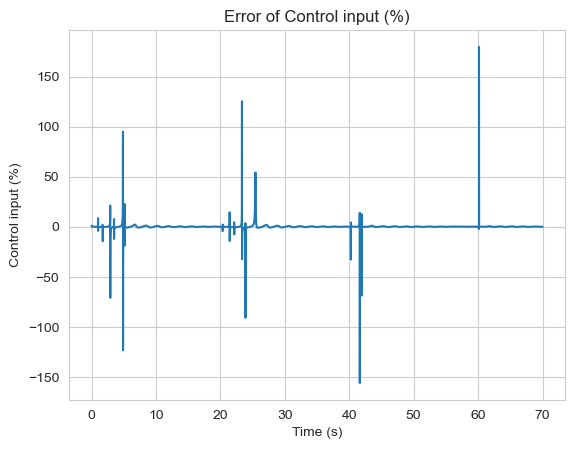

In [56]:
plotError(errorData, 'u_pct', 'Control input (%)')